In [1]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [2]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
searched_products = events[events['event'] == 'searched products']
searched_products = searched_products[['timestamp','person','search_term']]
searched_products.head()

,timestamp,person,search_term
157,2018-02-06 02:29:49,00204059,moto g 4
159,2018-02-06 02:32:41,00204059,moto g 4
238,2018-05-21 19:56:33,0024ad28,comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,0024ad28,comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,0024ad28,comprar celulares seminovos bom e barato em po...


In [4]:
searched_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56073 entries, 157 to 1011280
Data columns (total 3 columns):
timestamp      56073 non-null datetime64[ns]
person         56073 non-null object
search_term    48967 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [5]:
searched_products['search_term'].isnull().value_counts() # habría que decidir que hacemos con los nulls

False    48967
True      7106
Name: search_term, dtype: int64

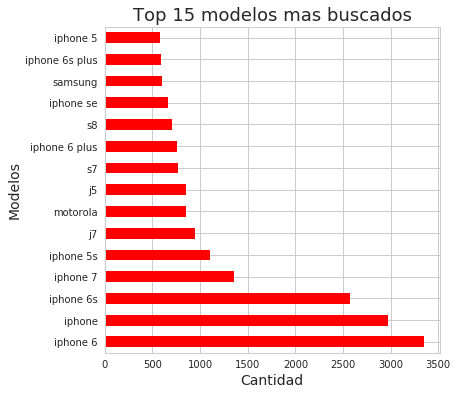

In [6]:
busquedas = searched_products['search_term'].dropna().map(lambda x: x.lower()).value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = busquedas.plot(kind = 'barh',color='red')
g.set_title('Top 15 modelos mas buscados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14);

In [7]:
#el diccionario esta hecho a mano, vi las primeras posiciones y de ahi arme el diccionario, se podria pensar algo mejor. 
#no vi por ahora alguna funcion que haga la que defini, por ahi hay algo hecho pero no encontre
marcas = {'iPhone':['iphone','7s','6s','5se','5c','iphone se'], 'Samsung':['j1','j2','j3','j4','j5','j6','j7','galaxy','s7','s6','s5','s8','s9','samsung'], 'Motorola':['moto'],'LG':['lg']}
def asignar_marca(modelo):
    for marca in marcas:
        for m in marcas[marca]:
            if m in modelo:
                return marca
    return 'Otro'
marcas_buscadas = searched_products['search_term'].dropna().map(lambda x: asignar_marca(x.lower())).value_counts()
marcas_buscadas 

iPhone      18982
Samsung     14659
Otro         8369
Motorola     5773
LG           1184
Name: search_term, dtype: int64

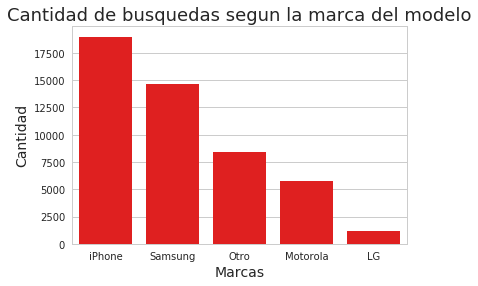

In [8]:
g = sns.barplot(x= marcas_buscadas.index, y=marcas_buscadas.values, orient= 'v',color='red')
g.set_title('Cantidad de busquedas segun la marca del modelo',fontsize = 18)
g.set_xlabel('Marcas',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

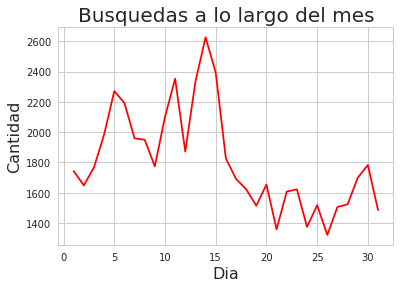

In [9]:
busquedas = searched_products['timestamp'].dt.day.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
g = busquedas.plot(color='red')
g.set_title('Busquedas a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

#### ¿Se relaciona la cantidad de busquedas con la cantidad de compras a lo largo del mes? #agrega sku

In [10]:
conversion = events[events['event'] == 'conversion']
# cambiar a quincena

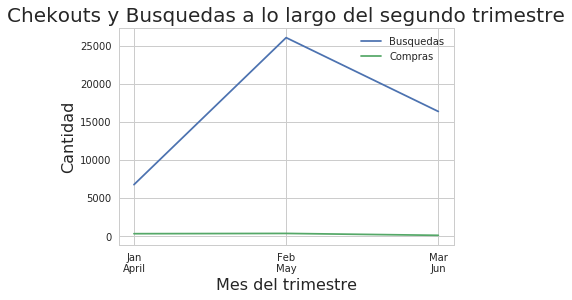

In [11]:
busquedas = searched_products[searched_products['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
compras = conversion[conversion['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
busquedas_vs_compras = busquedas.to_frame().rename({'timestamp':'Busquedas'},axis = 'columns') 
busquedas_vs_compras['Compras'] = compras
g = busquedas_vs_compras.plot()
g.set_title('Chekouts y Busquedas a lo largo del segundo trimestre',fontsize = 20)
g.set_xlabel('Mes del trimestre',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([1, 2,3], ["Jan\nApril", "Feb\nMay", "Mar\nJun"]);  

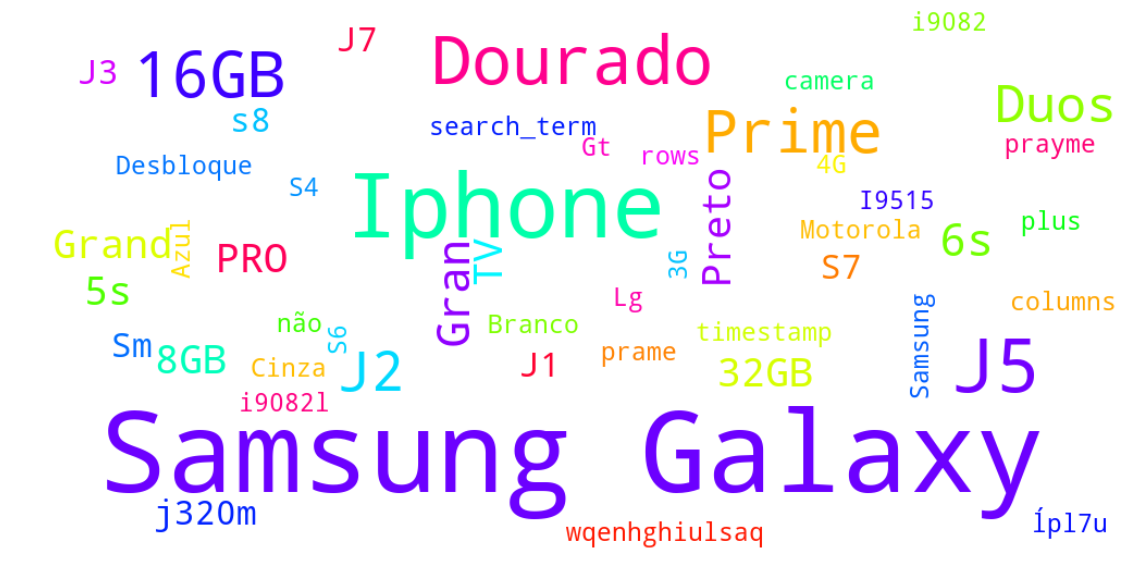

In [12]:
words_df = searched_products.groupby('search_term').agg({'timestamp':'count'}).reset_index().sort_values(by='timestamp', ascending=False)

wordcloud= WordCloud(width=1000, height=500, colormap="hsv", background_color='white').generate(str(words_df))

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis('off')
plt.show()